# Модель Уоттса—Строгаца

Модель Уоттса—Строгаца — это модель генерации случайных графов, которая создаёт графы со свойствами малого мира, в том числе с короткой средней длиной пути и высокой кластеризацией. Она была предложена Дунканом Дж. Уоттсом и Стивеном Строгацем в их статье, опубликованной в 1998 году в научном журнале Nature. Модель также стала известна как (бета-модель Уоттса) после того, как Уоттс использовал
βдля её формулировки в своей научно-популярной книге «Шесть степеней свободы».

## Области применения

Эта модель хорошо описывает многие реальные сети, такие как социальные сети, сети интернета, и даже биологические сети (например, взаимодействия между белками). Она помогает объяснить феномен "мира тесен", когда незнакомые люди могут быть связаны через небольшое количество промежуточных знакомых

## Основные свойства



*   **Малая длина кратчайшего пути**:
Расстояние между двумя произвольно выбранными вершинами в графе растет пропорционально логарифму от числа вершин
N
N в сети. Это означает, что даже в больших графах, среднее расстояние между вершинами остается небольшим, что делает их легко доступными друг для друга
*   **Высокий коэффициент кластеризации**: Графы Уоттса–Строгаца имеют значительно более высокий коэффициент кластеризации по сравнению с обычными случайными графами. Это означает, что если два узла связаны с третьим узлом, то с большой вероятностью они также будут связаны между собой



# Основные характеристики графа:

## Плотность (density)
Плотность графа — это мера, которая описывает, насколько близко количество рёбер в графе к максимально возможному количеству рёбер для графа с таким же числом вершин. Для неориентированного простого графа плотность $D$ можно выразить следующим образом:

$$D = \frac{L}{\frac{N(N-1)}{2}} = \frac{2L}{N(N-1)},$$
где:
*   L — количество рёбер в графе,
*   N — количество вершин в графе,
*   $\frac{N(N-1)}{2}$ — максимальное количество рёбер в полном графе (графе, в котором каждая пара вершин соединена ребром).

## Связность (connectedness)

* **Связный граф**:
Граф называется связным, если существует путь между любой парой его вершин. Это означает, что можно добраться от одной вершины до любой другой, не покидая граф.
* **Несвязный граф**:
Если хотя бы две вершины не соединены, граф называется несвязным или разомкнутым. В таком графе существуют компоненты связности, которые представляют собой максимальные связные подграфы.

## Диаметр (diameter)

Диаметр графа $\delta(G)$ определяется как максимальное расстояние
$d(v_i,v_j)$ между всеми парами вершин $v_i$ и $v_j$​ в графе $G$:

$$\max_{v_i, v_j \in V} d(v_i, v_j)$$

## Длина среднего кратчайшего пути (average shortest path length)

Средняя длина кратчайшего пути считается, как среднее значение всех кратчайших путей между всеми парами вершин в графе:

$$Average Shortest Path Length = \frac{1}{N(N-1)}\sum_{i \not= j}d(v_i, v_j)$$

## Средний коэффициент кластеризации (average clustering coefficient)

Средний коэффициент кластеризации — это мера, которая описывает степень, с которой узлы в графе стремятся объединяться в кластеры. Он позволяет оценить, насколько близки соседи каждого узла к образованию полного графа (клики), где все узлы связаны между собой.

$$C = \frac{1}{N}\sum_{i=1}^N C_i$,$
где:
*   $C_i$ - локальный коэффициент кластеризации для узла $i$

# Параметры модели Уоттса—Строгаца

*   k - число соседей, с которыми соединена вершина в кольцевой топологии. Можно приближенно вычислить следующим образом: $k = \Big[ density \cdot N \Big]$
*   p - вероятность повторного подключения каждого ребра (для простоты, всегда будем использовать значение 0.5)

# Основные библиотеки

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

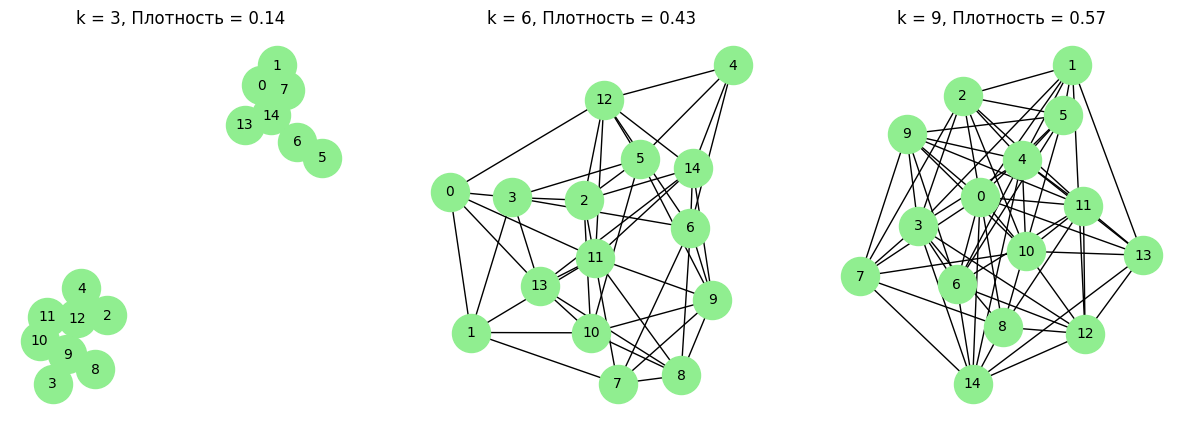

In [ ]:
# Параметры графов
n = 15  # количество вершин
density_values = [0.2, 0.4, 0.6]  # заданные плотности

# Создание фигуры для рисования подграфиков
fig, axes = plt.subplots(1, len(density_values), figsize=(15, 5))  # один ряд, количество столбцов = количеству графов
graphs = []

for i, density in enumerate(density_values):
    # Вычисление необходимого числа соседей для заданной плотности
    k = int(density * n)  # число соседей

    # Формально убедимся, что k не превышает n-1
    k = min(k, n - 1)

    # Генерация графа Уоттса–Строгаца
    p = 0.5  # вероятность переподключения рёбер (можно настроить)
    G = nx.watts_strogatz_graph(n, k=k, p=p)
    graphs.append(G)

    # Вычисление плотности графа
    density = nx.density(G)

    # Вычисление числа ребер
    num_edges = G.number_of_edges()

    ax = axes[i]
    nx.draw(G, with_labels=True, node_color="lightgreen", node_size=750, font_size=10, ax=ax)

    ax.set_title(f"k = {k}, Плотность = {density:.2f}")

# Показываем все графы
plt.show()

In [ ]:

# Функция для анализа графа
def analyze_graph(G):
    # Связность
    is_connected = nx.is_connected(G)
    if is_connected:
        largest_cc = len(max(nx.connected_components(G), key=len))
        weakly_connected = largest_cc  # Для неориентированного графа это одно и то же
    else:
        largest_cc = len(max(nx.connected_components(G), key=len))
        weakly_connected = len(G)

    # Диаметр
    diameter = nx.diameter(G) if is_connected else float('inf')

    # Средний кратчайший путь
    avg_shortest_path_length = nx.average_shortest_path_length(G) if is_connected and len(G) > 1 else float('inf')

    # Распределение степеней
    degree_sequence = [d for n, d in G.degree()]

    # Средний коэфф. кластеризации
    avg_clastering = nx.average_clustering(G)

    # Плотность
    density_calc = nx.density(G)

    return {
        "is_connected": is_connected,
        "largest_cc": largest_cc,
        "weakly_connected": weakly_connected,
        "diameter": diameter,
        "avg_shortest_path_length": avg_shortest_path_length,
        "degree_sequence": degree_sequence,
        "average clastering": avg_clastering,
        "density_calc": density_calc
    }

def print_res(size, density, result):
    print(f"Size: {size}")
    print(f"Density: {density}")
    print(f"Density calculated: {result['density_calc']}")
    print(f"Connected: {result['is_connected']}")
    print(f"Largest CC: {result['largest_cc']}")
    print(f"Weakly Connected: {result['weakly_connected']}")
    print(f"Diameter: {result['diameter']}")
    print(f"Average Shortest Path Length: {result['avg_shortest_path_length']}")
    print(f"Average clastering coeff: {result['average clastering']}")

    degrees = [degree for node, degree in G.degree()]
    plt.hist(degrees, bins=50)
    plt.title("Degree Distribution")
    plt.xlabel("Degree")
    plt.ylabel("Count")
    plt.show()
    print('---------------------------------------')


Size: 15
Density: 0.2
Density calculated: 0.14285714285714285
Connected: False
Largest CC: 8
Weakly Connected: 15
Diameter: inf
Average Shortest Path Length: inf
Average clastering coeff: 0.0


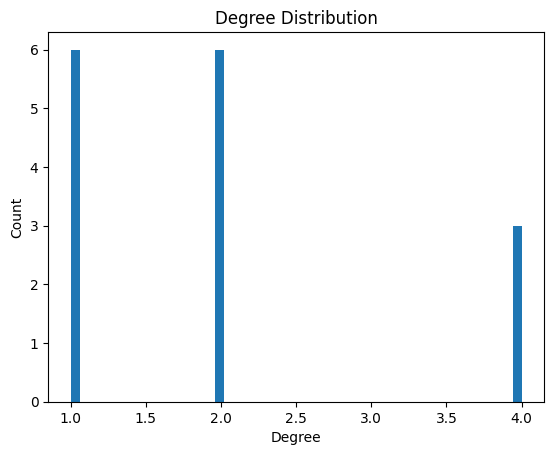

---------------------------------------
Size: 15
Density: 0.4
Density calculated: 0.42857142857142855
Connected: True
Largest CC: 15
Weakly Connected: 15
Diameter: 3
Average Shortest Path Length: 1.5809523809523809
Average clastering coeff: 0.3593650793650793


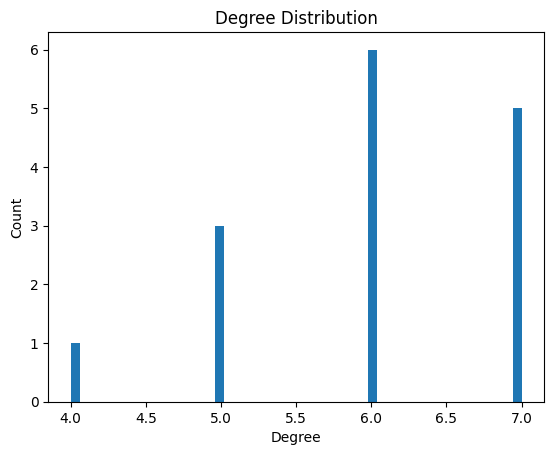

---------------------------------------
Size: 15
Density: 0.6
Density calculated: 0.5714285714285714
Connected: True
Largest CC: 15
Weakly Connected: 15
Diameter: 2
Average Shortest Path Length: 1.4285714285714286
Average clastering coeff: 0.5098412698412698


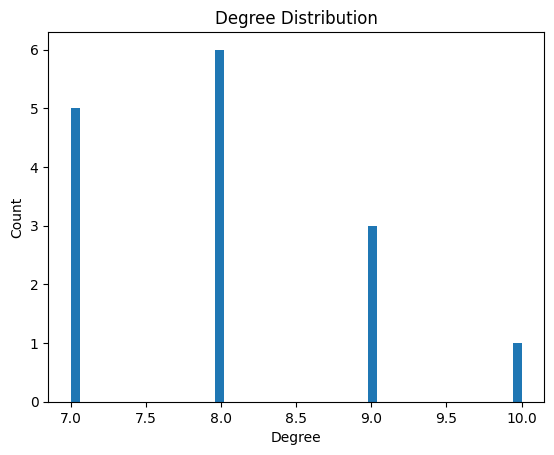

---------------------------------------


In [ ]:
for i, G in enumerate(graphs):
    res = analyze_graph(G)
    print_res(n, density_values[i], res)

# Большие графы $N \geq 50 000$

In [ ]:
# Параметры
sizes = [50000, 60000, 70000, 80000]  # Размеры графов
densities = [0.0001, 0.0002, 0.0005]  # Плотности

from datetime import datetime
def get_hms():
    return str(datetime.now().time())[:-7]

def print_res_to_file(path, name, size, density, result):
    with open(path + '/' + name + '.txt', 'w') as f:
        print(f"'size': {size},", file=f)
        print(f"'density': {density},", file=f)
        print(f"'connected': {result['is_connected']},", file=f)
        print(f"'largest_cc': {result['largest_cc']},", file=f)
        print(f"'weakly_connected': {result['weakly_connected']},", file=f)
        print(f"'diameter': {result['diameter']},", file=f)
        print(f"'avg_shortest_path_length': {result['avg_shortest_path_length']},", file=f)
        print(f"'average_clastering': {result['average_clastering']},", file=f)
        print(f"'density_calc': {result['density_calc']}", file=f)
        print(f"'degree_sequence': [{result['degree_sequence']}],", file=f)

# Функция для анализа графа
def analyze_graph(G):
    # Связность
    print(f'{get_hms()} Связность')
    is_connected = nx.is_connected(G)
    if is_connected:
        largest_cc = len(max(nx.connected_components(G), key=len))
        weakly_connected = largest_cc  # Для неориентированного графа это одно и то же
    else:
        largest_cc = len(max(nx.connected_components(G), key=len))
        weakly_connected = len(G)

    # Диаметр
    print(f'{get_hms()} Диаметр')
    diameter = nx.diameter(G) if is_connected and len(G) > 1 else float('inf')

    # Средний кратчайший путь
    print(f'{get_hms()} Средний кратчайший путь')
    avg_shortest_path_length = nx.average_shortest_path_length(G) if is_connected and len(G) > 1 else float('inf')

    # Распределение степеней
    print(f'{get_hms()} Распред. степеней')
    degree_sequence = [d for n, d in G.degree()]

    # Средний коэфф. кластеризации
    print(f'{get_hms()} Средний коэфф. кластеризации')
    avg_clastering = nx.average_clustering(G)

    # Плотность
    print(f'{get_hms()} Плотность')
    density_calc = nx.density(G)


    return {
        "is_connected": is_connected,
        "largest_cc": largest_cc,
        "weakly_connected": weakly_connected,
        "diameter": diameter,
        "avg_shortest_path_length": avg_shortest_path_length,
        "degree_sequence": degree_sequence,
        "average_clastering": avg_clastering,
        "density_calc": density_calc
    }

def start_analyse():
    # Генерация и анализ графов
    results = []
    for size in sizes:
        for density in densities:
            time = get_hms().replace(':', '.')
            # Генерация графа Уоттса–Строгаца
            G = nx.watts_strogatz_graph(size, int(size * density), 0.5)
            print(f'{get_hms()}\tGraph size {size}, dencity {density} generated')

            # Анализ графа
            result = analyze_graph(G)
            results.append((size, density, result))

            print(f'{get_hms()}\tAnalysed')

            #  Запись в файл
            print_res_to_file('./graph_res', f's{size} d{density}', size, density, result)


## Приведенный выше код был запущен на компьютере, были получены следующие результаты:

In [ ]:
# Читаем сохраненные результаты
def read_results(sizes : list, densities : list):
    path = 'result/'

    res = []
    for size in sizes:
        for density in densities:
            with open(f's{size} d{density}.txt', 'r') as f:
                f_data = f.readlines()

            experiment_res = {}
            for line in f_data:
                feature, value = line.split(':')
                feature = feature.replace("'", "")

                if feature == 'degree_sequence':
                    value = value[3:-4]
                    value = [int(v) for v in value.split(',')]
                elif feature == 'connected':
                    value = bool(value.split(',')[0])
                elif feature == 'size' or feature == 'largest_cc' or feature == 'weakly_connected' or feature == 'diameter':
                    value = int(value.split(',')[0])
                else:
                    value = float(value.split(',')[0])

                experiment_res[feature] = value
            res.append(experiment_res)
    return res

results = read_results(sizes, densities)

Кол-во вершин: 50000
Ожидаемая плотность: 0.0001
Итоговая плотность: 8.000160003200064e-05
Число соседей: 5
Связность: True
Диаметр: 15
Средняя длина кратчайшего пути: 9.013974100282006
Средний коэффициент кластеризации: 0.06805987301586712


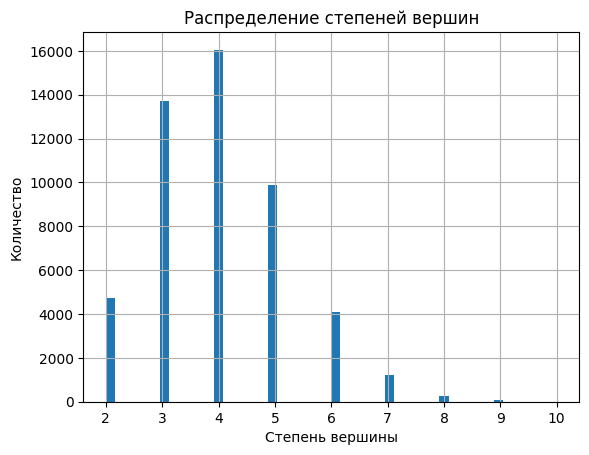



Кол-во вершин: 50000
Ожидаемая плотность: 0.0002
Итоговая плотность: 0.0002000040000800016
Число соседей: 10
Связность: True
Диаметр: 7
Средняя длина кратчайшего пути: 5.2416029216584334
Средний коэффициент кластеризации: 0.08491693108112375


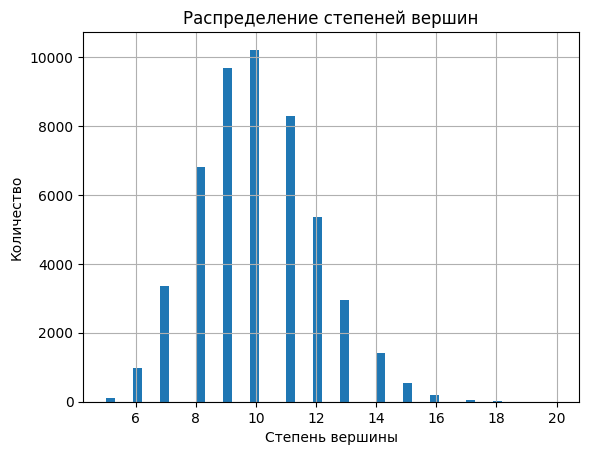



Кол-во вершин: 50000
Ожидаемая плотность: 0.0005
Итоговая плотность: 0.00048000960019200384
Число соседей: 25
Связность: True
Диаметр: 5
Средняя длина кратчайшего пути: 3.8480317990359807
Средний коэффициент кластеризации: 0.09094128439814361


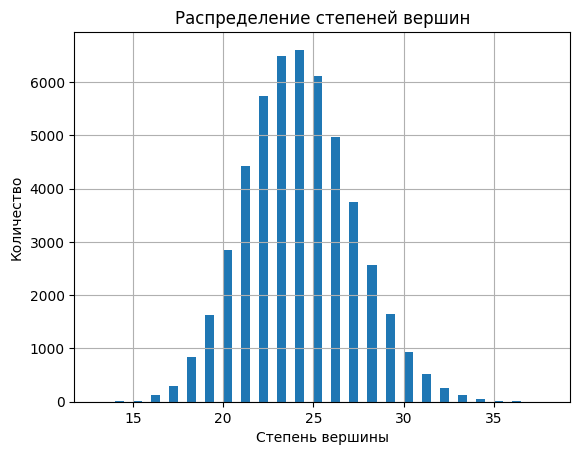



Кол-во вершин: 60000
Ожидаемая плотность: 0.0001
Итоговая плотность: 0.00010000166669444491
Число соседей: 6
Связность: True
Диаметр: 10
Средняя длина кратчайшего пути: 6.859155007027895
Средний коэффициент кластеризации: 0.07751038674288602


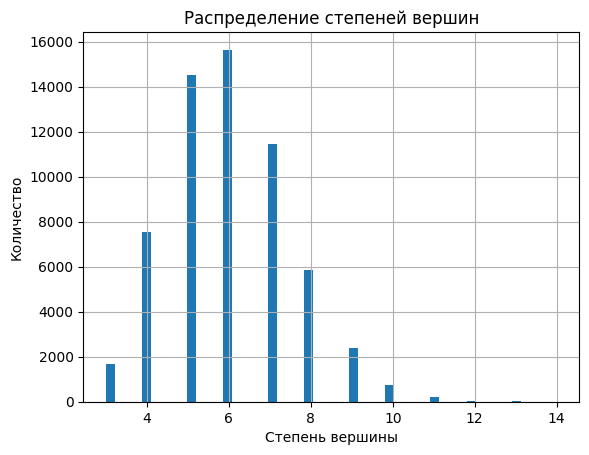



Кол-во вершин: 60000
Ожидаемая плотность: 0.0002
Итоговая плотность: 0.00020000333338888982
Число соседей: 12
Связность: True
Диаметр: 7
Средняя длина кратчайшего пути: 4.931349741384579
Средний коэффициент кластеризации: 0.0859620734764698


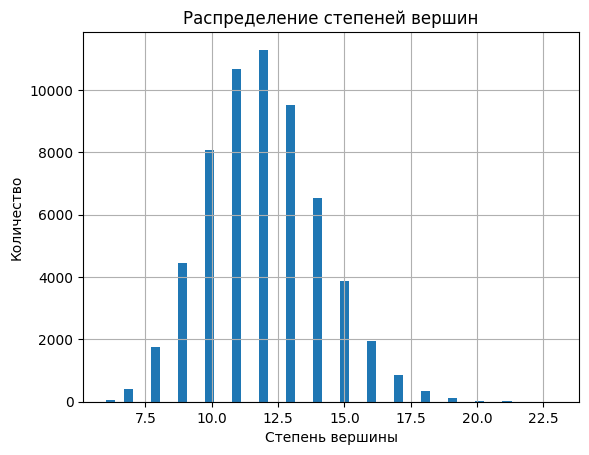



Кол-во вершин: 60000
Ожидаемая плотность: 0.0005
Итоговая плотность: 0.0005000083334722246
Число соседей: 30
Связность: True
Диаметр: 5
Средняя длина кратчайшего пути: 3.7271566742779045
Средний коэффициент кластеризации: 0.09123685992883433


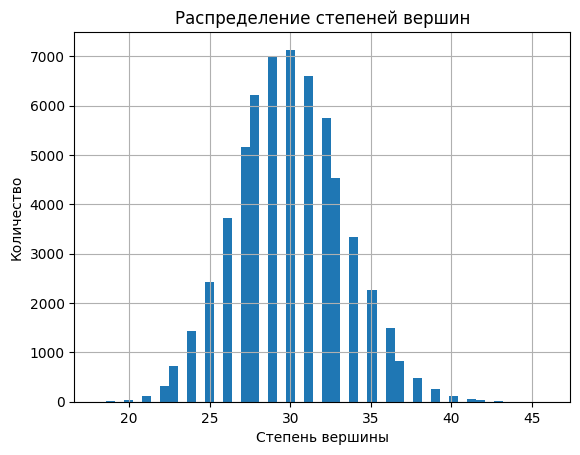



Кол-во вершин: 70000
Ожидаемая плотность: 0.0001
Итоговая плотность: 8.57155102215746e-05
Число соседей: 7
Связность: True
Диаметр: 10
Средняя длина кратчайшего пути: 6.956806799280806
Средний коэффициент кластеризации: 0.07810056998557377


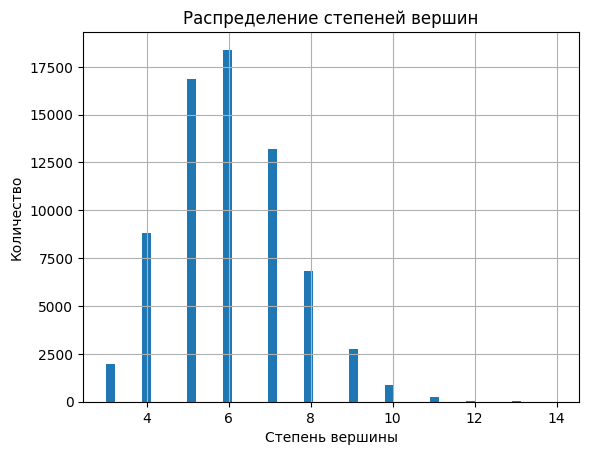



Кол-во вершин: 70000
Ожидаемая плотность: 0.0002
Итоговая плотность: 0.00020000285718367404
Число соседей: 14
Связность: True
Диаметр: 6
Средняя длина кратчайшего пути: 4.725330685132237
Средний коэффициент кластеризации: 0.08738418102485628


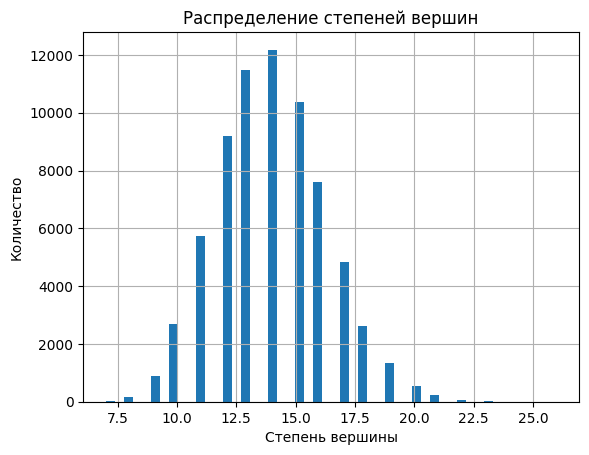



Кол-во вершин: 70000
Ожидаемая плотность: 0.0005
Итоговая плотность: 0.0004857212245889227
Число соседей: 35
Связность: True
Диаметр: 5
Средняя длина кратчайшего пути: 3.6737880871767556
Средний коэффициент кластеризации: 0.09156733667241618


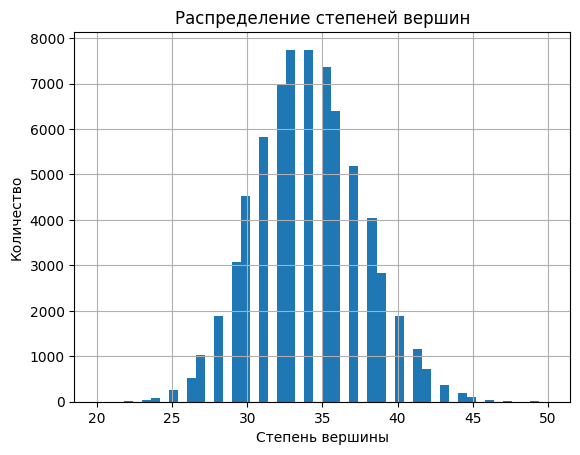



Кол-во вершин: 80000
Ожидаемая плотность: 0.0001
Итоговая плотность: 0.0001000012500156252
Число соседей: 8
Связность: True
Диаметр: 9
Средняя длина кратчайшего пути: 6.037968866485831
Средний коэффициент кластеризации: 0.08151417144335077


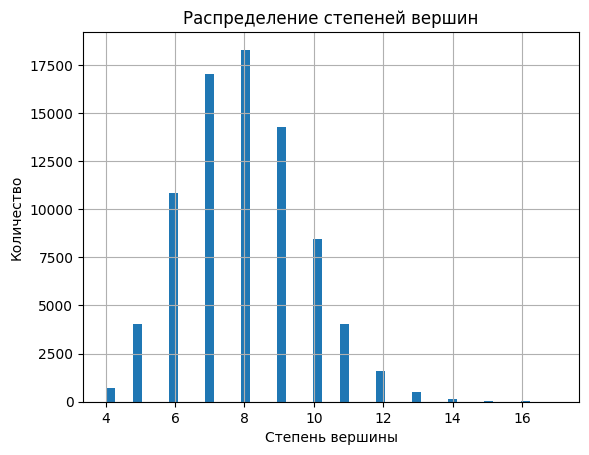



Кол-во вершин: 80000
Ожидаемая плотность: 0.0002
Итоговая плотность: 0.0002000025000312504
Число соседей: 16
Связность: True
Диаметр: 6
Средняя длина кратчайшего пути: 4.586193539919249
Средний коэффициент кластеризации: 0.088047940882857


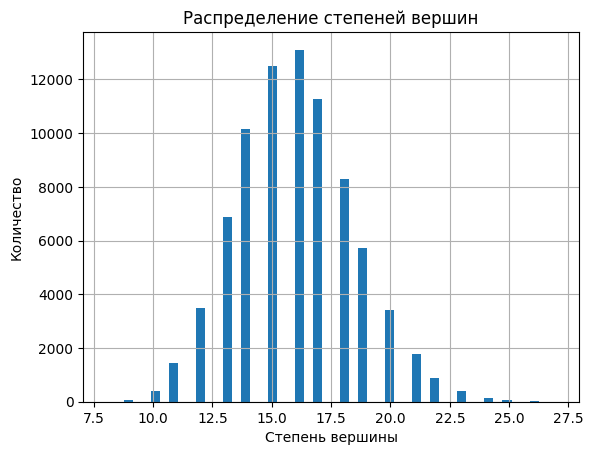



Кол-во вершин: 80000
Ожидаемая плотность: 0.0005
Итоговая плотность: 0.000500006250078126
Число соседей: 40
Связность: True
Диаметр: 5
Средняя длина кратчайшего пути: 3.5734494278053477
Средний коэффициент кластеризации: 0.09225889852839295


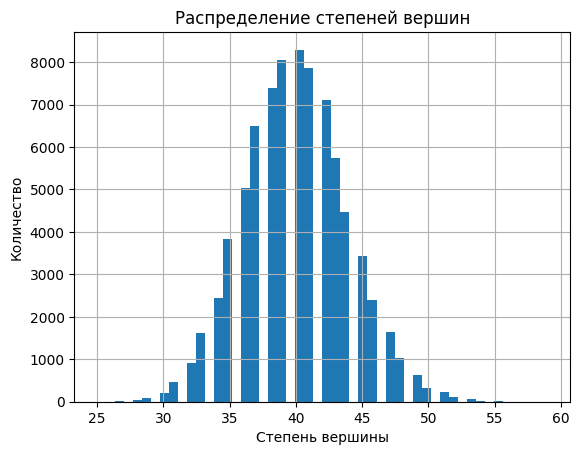

In [ ]:
for graph_res in results:
    print('Кол-во вершин:', graph_res['size'])
    print('Ожидаемая плотность:', graph_res['density'])
    print('Итоговая плотность:', graph_res['density_calc'])
    print('Число соседей:', int(graph_res['size']*graph_res['density']))
    print('Связность:', graph_res['connected'])
    print('Диаметр:', graph_res['diameter'])
    print('Средняя длина кратчайшего пути:', graph_res['avg_shortest_path_length'])
    print('Средний коэффициент кластеризации:', graph_res['average_clastering'])

    plt.hist(graph_res['degree_sequence'], bins = 50)
    plt.title('Распределение степеней вершин')
    plt.xlabel('Степень вершины')
    plt.ylabel('Количество')
    plt.grid()
    plt.show()
    print('\n')

In [ ]:
count_sizes = len(sizes)     # 4
count_dens = len(densities)  # 3

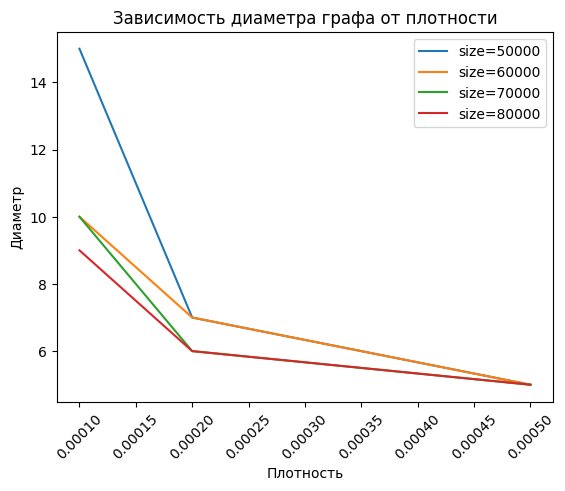

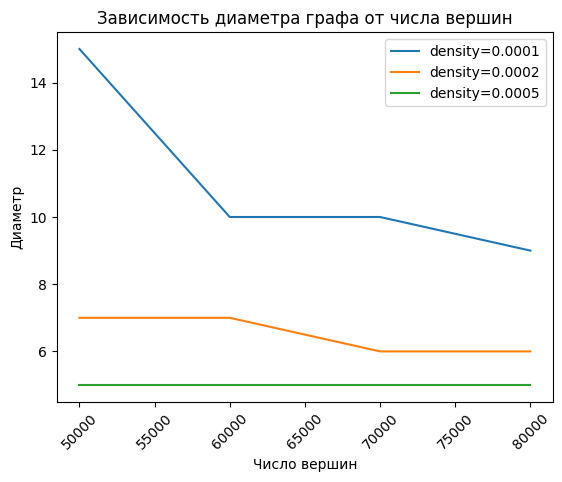

In [ ]:
diameters=[g['diameter'] for g in results]
for i in range(count_sizes):
    plt.plot(densities, diameters[i*count_dens:i*count_dens+count_dens], label=f'size={sizes[i]}')
    plt.title('Зависимость диаметра графа от плотности')
    plt.xticks(rotation = 45)
    plt.ylabel('Диаметр')
    plt.xlabel('Плотность')
    plt.legend()
plt.show()

for i in range(count_dens):
    plt.plot(sizes, diameters[i::count_dens], label=f'density={densities[i]}')
    plt.title('Зависимость диаметра графа от числа вершин')
    plt.xticks(rotation = 45)
    plt.ylabel('Диаметр')
    plt.xlabel('Число вершин')
    plt.legend()
plt.show()

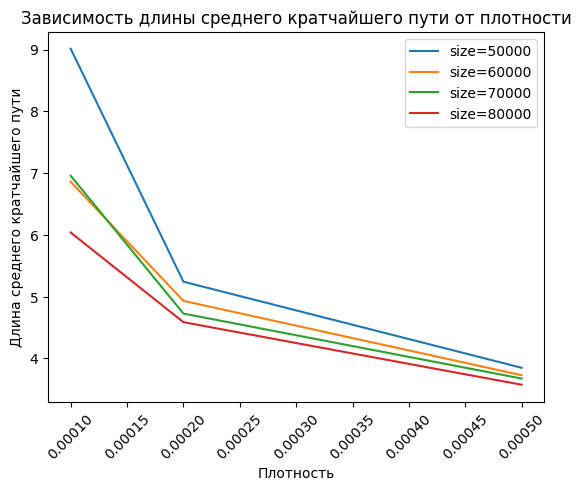

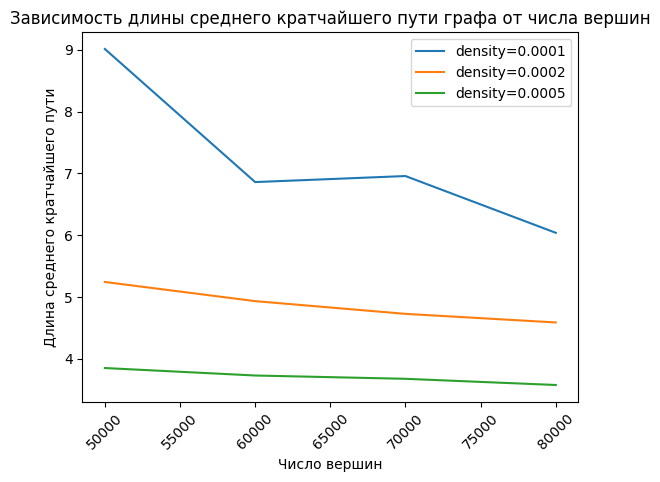

In [ ]:
average_shortest_path_length=[g['avg_shortest_path_length'] for g in results]
for i in range(count_sizes):
    plt.plot(densities, average_shortest_path_length[i*count_dens:i*count_dens+count_dens], label=f'size={sizes[i]}')
    plt.title('Зависимость длины среднего кратчайшего пути от плотности')
    plt.xticks(rotation = 45)
    plt.ylabel('Длина среднего кратчайшего пути')
    plt.xlabel('Плотность')
    plt.legend()
plt.show()

for i in range(count_dens):
    plt.plot(sizes, average_shortest_path_length[i::count_dens], label=f'density={densities[i]}')
    plt.title('Зависимость длины среднего кратчайшего пути графа от числа вершин')
    plt.xticks(rotation = 45)
    plt.ylabel('Длина среднего кратчайшего пути')
    plt.xlabel('Число вершин')
    plt.legend()
plt.show()

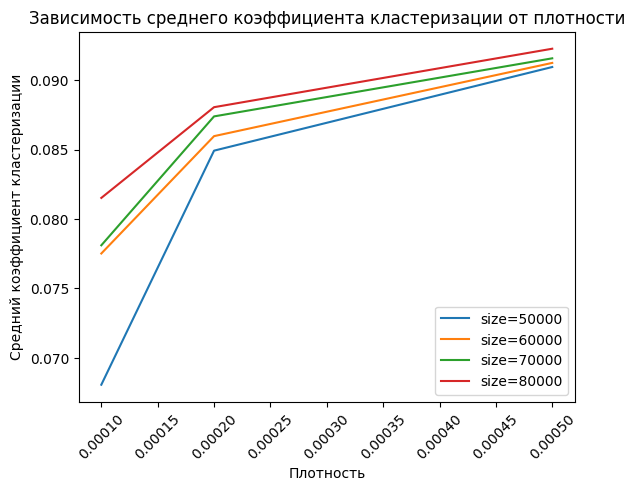

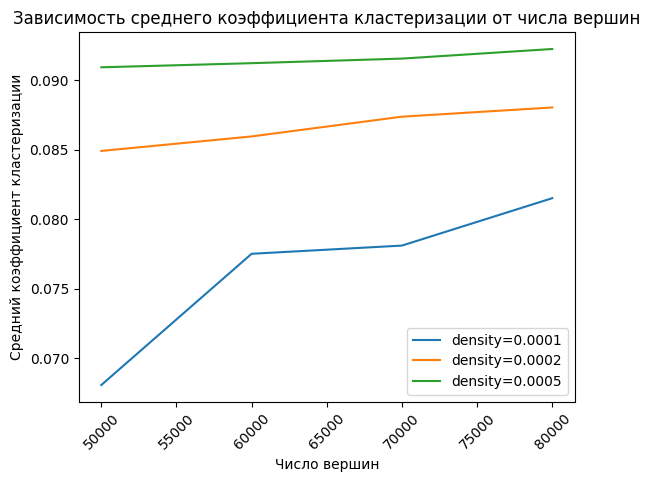

In [ ]:
average_clastering=[g['average_clastering'] for g in results]
for i in range(count_sizes):
    plt.plot(densities, average_clastering[i*count_dens:i*count_dens+count_dens], label=f'size={sizes[i]}')
    plt.title('Зависимость среднего коэффициента кластеризации от плотности')
    plt.xticks(rotation = 45)
    plt.ylabel('Средний коэффициент кластеризации')
    plt.xlabel('Плотность')
    plt.legend()
plt.show()

for i in range(count_dens):
    plt.plot(sizes, average_clastering[i::count_dens], label=f'density={densities[i]}')
    plt.title('Зависимость среднего коэффициента кластеризации от числа вершин')
    plt.xticks(rotation = 45)
    plt.ylabel('Средний коэффициент кластеризации')
    plt.xlabel('Число вершин')
    plt.legend()
plt.show()

50000
Число соседей: 2
Плотность: 4.000080001600032e-05
Связность: False
Размер наибольшей компоненты: 40178
Количество компонент связности: 4
Количество вершин подграфа: 40178
Количество ребер в подграфе: 40178
Плотность подграфа: 4.977972471812231e-05
Диаметр подграфа: 952
Средняя длина кратчайшего пути в подграфе: 343.46278434488687


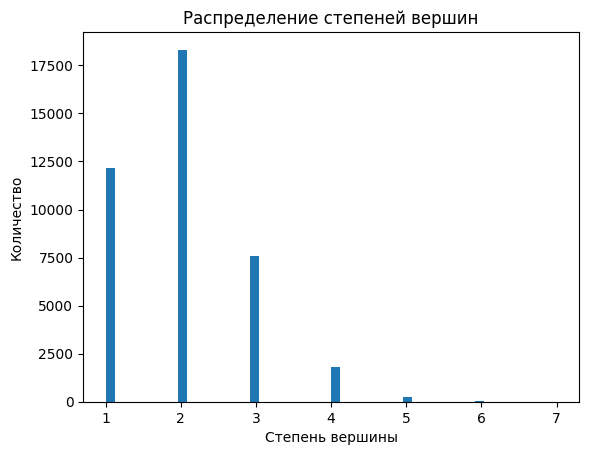

In [18]:
size = 50000
density = 0.00004
G = nx.watts_strogatz_graph(50000, int(size*density), 0.5)
num_edges = G.number_of_edges()
print(num_edges)

# Число соседей
print(f"Число соседей: {int(size*density)}")

# Плотность
density = nx.density(G)
print(f"Плотность: {density}")

# Связность
is_connected = nx.is_connected(G)
largest_component = max(nx.connected_components(G))
print(f"Связность: {is_connected}")
print(f"Размер наибольшей компоненты: {len(largest_component)}")

# Получаем список связных компонент
connected_components = list(nx.connected_components(G))

# Выбираем наибольшую компоненту
largest_component = max(connected_components, key=len)

# Создаем подграф для наибольшей компоненты
lcc = G.subgraph(largest_component)

# Количество компонент связности
count_connected_components = len(connected_components)
print(f"Количество компонент связности: {count_connected_components}")

# Количество вершин в подграфе
num_nodes = lcc.number_of_nodes()
print(f"Количество вершин подграфа: {num_nodes}")

# Количество ребер в подграфе
num_edges = lcc.number_of_edges()
print(f"Количество ребер в подграфе: {num_edges}")

# Вычисление плотности графа
density = nx.density(lcc)
print(f"Плотность подграфа: {density}")

# Диаметр
diameter = nx.diameter(lcc)
print(f"Диаметр подграфа: {diameter}")

# Длина среднего кратчайшего пути
average_shortest_path_length = nx.average_shortest_path_length(lcc)
print(f"Средняя длина кратчайшего пути в подграфе: {average_shortest_path_length}")

# Получаем степени всех узлов
degree_sequence = [degree for node, degree in lcc.degree()]
plt.hist(degree_sequence, bins = 50)
plt.title("Распределение степеней вершин")
plt.xlabel("Степень вершины")
plt.ylabel("Количество")
plt.show()

# Выводы

## 1. Диаметр графа

* При увеличении плотности графа диаметр, очевидно, уменьшается.

* При увеличении числа вершин графа диаметр также уменьшается, особенно это заметно при меньших плотносях.

## 2. Длина среднего кратчайшего пути

* При увеличении плотности графа длина среднего кратчайшего пути, как и в случае с диаметром, уменьшается.

* При увеличении числа вершин графа длина среднего кратчайшего пути немного уменьшилась (ощутимый эффект заметем только при самом малом параметре плотности).

## 3. Средний коэффициент кластеризации

* При увеличении плотности графа средний коэффициент кластеризации увеличивается.

* При увеличении числа вершин средний коэффициент кластеризации немного возрастает. Возможно, это связано со слишком низкими плотностями в экспериментах.

## 4. Связность

* В приведенных выше 12 экспериментах мы брали относительно высокие параметры плотности и числа вершин, поэтому все рассматриваемые графы оказались связные.

* В последнем эксперименте был получен несвязный граф. В данном эксперименте граф имел всего 4 компоненты связности. Мы рассмотрели наибольшую компоненту этого графа. Из-за малого количества ребер между вершинами (число ребер подграфа равно числу его вершин) диаметр и длина среднего кратчайшего пути оказались значительно выше предыдущих экспериментов.

